# House Price Prediction

## Building Machine Learning Pipelines: Data Analysis Phase

<p>In this and the upcoming videos we will focus on creating Machine Learning Pipelines considering all the life cycle of a Data Science Projects. This will be important for professionals who have not worked with huge dataset.</p>

In [1]:
# importing all requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# path of the file
PATH = r'../dataset/'

# genrally, the whole columns is not visible, So, to display all columns
pd.pandas.set_option('display.max_columns', None)

In [2]:
# read the dataset
df = pd.read_csv(PATH + 'train.csv')
print(df.shape)
df.head(3)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## 1. Finding null values in the dataset

In [3]:
# this method is not able to show all the columns having null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<h3> ==> About a Method</h3> <br>

<div style="font-size: 16px;">
<p style="font-weight: bold">df[column].isnull().mean()</p>
    
df[column] => it will show you all records for particluar column <br>
df[column].isnull() => it will give true(for nan value) and false(for non-nan value) values and 
                    it is treated as 1 and 0. <br>
df[column].isnull().mean() => it will give the mean of the list given by the previous method. 
                    The mean of zeros and ones and this will finally give the (percentage/100).<br>
</div>

In [4]:
# now, traverse and find all the columns having null values and how many are there
# also round-of the deciaml point values
np.round(df['Alley'].isnull().mean() * 100, 4)

93.7671

In [5]:
# now , display it for all the features (using list comprehension)
[feature + ": " + str(np.round(df[feature].isnull().mean() * 100, 2)) + "% missing values" 
 for feature in df.columns 
 if df[feature].isnull().sum() > 0]

['LotFrontage: 17.74% missing values',
 'Alley: 93.77% missing values',
 'MasVnrType: 0.55% missing values',
 'MasVnrArea: 0.55% missing values',
 'BsmtQual: 2.53% missing values',
 'BsmtCond: 2.53% missing values',
 'BsmtExposure: 2.6% missing values',
 'BsmtFinType1: 2.53% missing values',
 'BsmtFinType2: 2.6% missing values',
 'Electrical: 0.07% missing values',
 'FireplaceQu: 47.26% missing values',
 'GarageType: 5.55% missing values',
 'GarageYrBlt: 5.55% missing values',
 'GarageFinish: 5.55% missing values',
 'GarageQual: 5.55% missing values',
 'GarageCond: 5.55% missing values',
 'PoolQC: 99.52% missing values',
 'Fence: 80.75% missing values',
 'MiscFeature: 96.3% missing values']

In [6]:
# Here, we can see alot of null values
# now, let's find some relation between null values and sales price
# which is our main goal to predict sales price
# sns.barplot(x=df['Alley'], y=df['SalePrice'], hue=None)

In [7]:
# create a dataframe only with those column, having null values
column_with_null = [feature for feature in df.columns if df[feature].isnull().sum()]

# create an empty dataframe and then add all features having null
df_null = pd.DataFrame()

# now, traverse and add columns in thd df_null
for feature in column_with_null:
    df_null[feature] = df[feature].copy()
    df_null[feature] = np.where(df[feature].isnull(), 1, 0)
    
# now, display some records
df_null.head(3)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


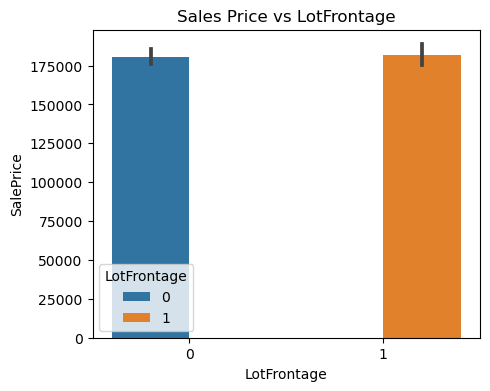

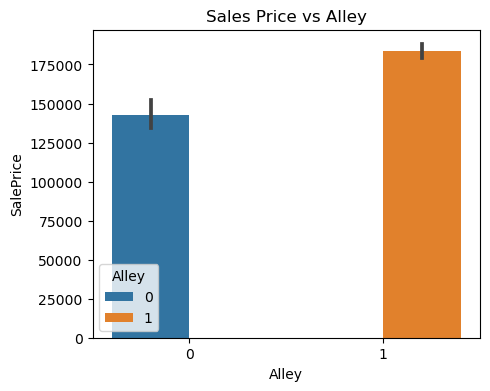

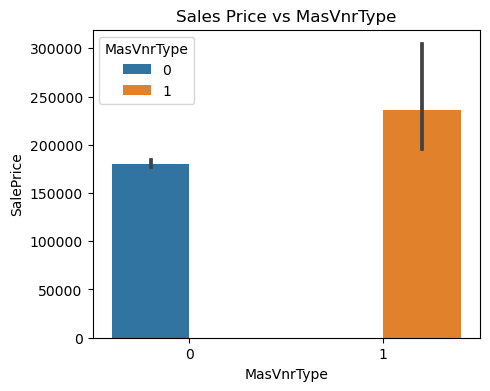

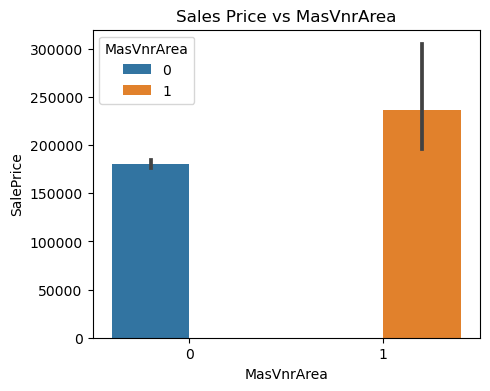

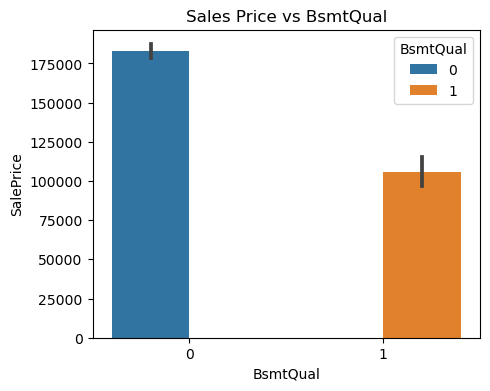

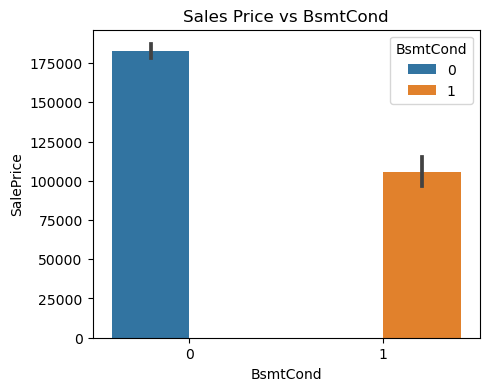

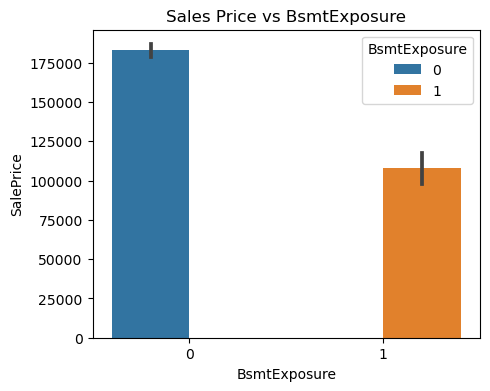

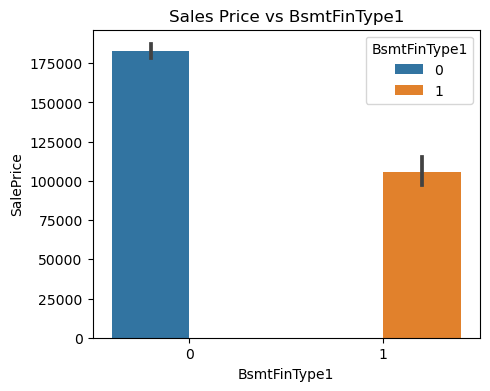

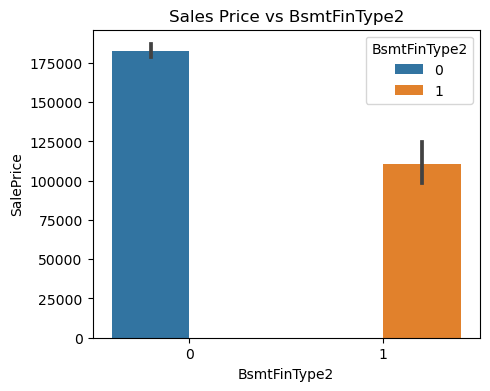

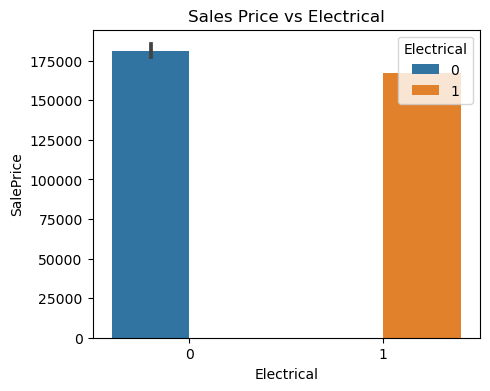

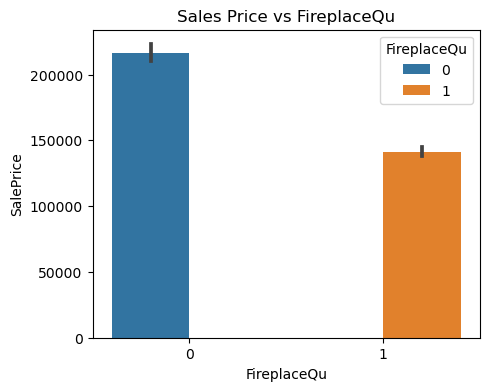

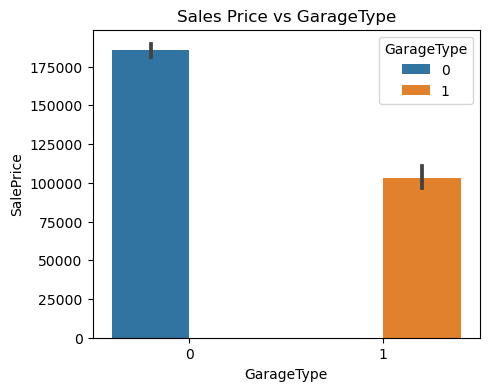

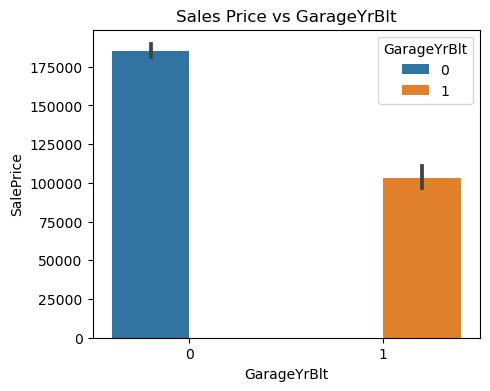

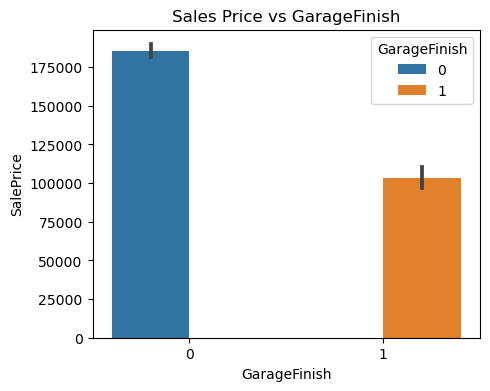

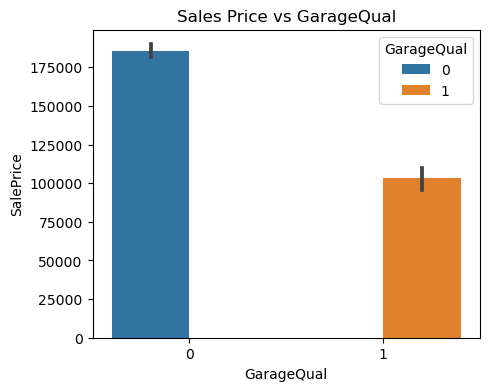

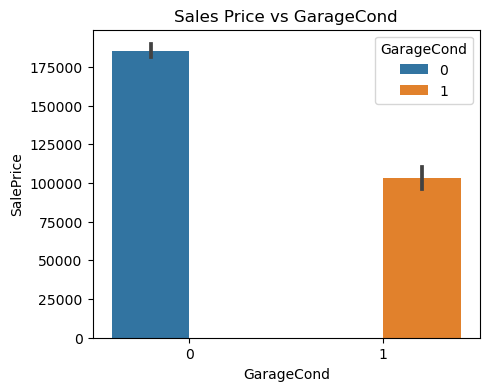

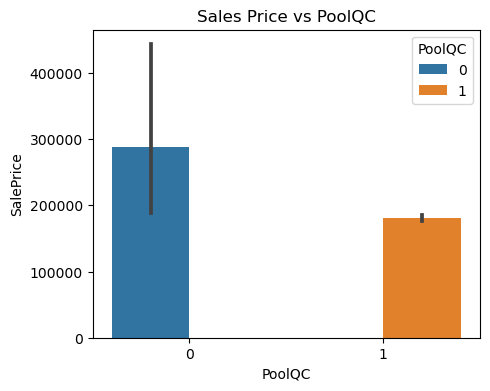

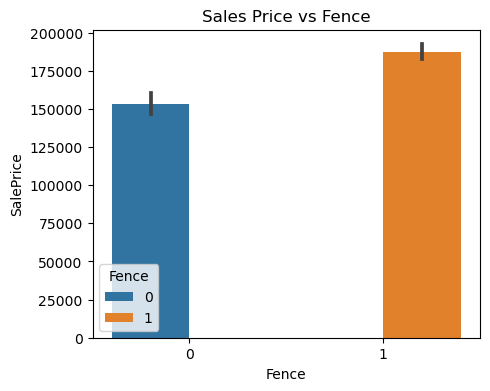

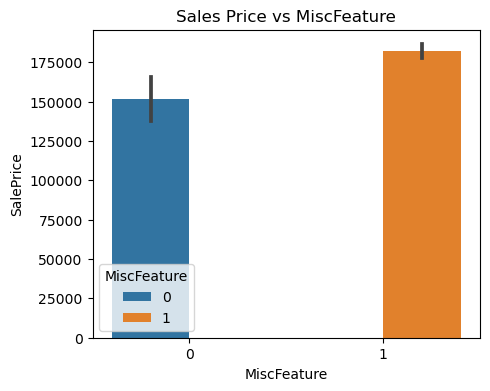

In [8]:
# now, visulaize the data
for feature in df_null.columns:
    
    plt.figure(figsize=(5, 4))
    sns.barplot(x=df_null[feature], y=df['SalePrice'], hue=df_null[feature])
    
    # plotting customization
    plt.title('Sales Price vs ' + feature)
    plt.show()
    
#     plt.subplots(figsize=(5, 4))
# this method is adding an empty plot

### Observation: 
Here, We can simply observe that null values in the dataset impact the sale-price. So, We need to replace the null values with some another meaningful data.

## 2. Finding numerical features in our dataset